In [29]:
import tensorflow.compat.v1 as tf
from matplotlib import pyplot as plt;
import numpy as np;
tf.disable_v2_behavior()

In [30]:
from tensorflow.keras.datasets import mnist

In [31]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [32]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [33]:
new_x_train=[[0] for i in range(x_train.shape[0])];
             
for i in range(x_train.shape[0]):
    array=np.array(x_train[i]);
    array=array.reshape((784,));
    new_x_train[i]=array;

x_train=np.array(new_x_train);

In [34]:
new_x_test=[[0] for i in range(x_test.shape[0])];
             
for i in range(x_test.shape[0]):
    array=np.array(x_test[i]);
    array=array.reshape((784,));
    new_x_test[i]=array;

x_test=np.array(new_x_test)

In [35]:
sess=tf.Session()
y_test=tf.one_hot(y_test,10);
y_train=tf.one_hot(y_train,10);
y_train=sess.run(y_train);
y_test=sess.run(y_test);

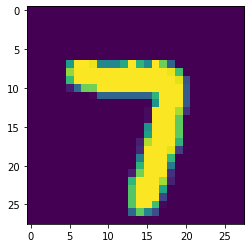

In [36]:
first_img=x_train[2090].reshape(28,28);
plt.imshow(first_img);
plt.show();

In [37]:
n_input=784;
hd1_layer=784;
hd2_layer=784;
n_output=10;

In [38]:
weights={
    'h1':tf.Variable(tf.random_normal([n_input,hd1_layer])),
    'h2':tf.Variable(tf.random_normal([hd1_layer,hd2_layer])),
    'out':tf.Variable(tf.random_normal([hd2_layer,n_output])),
}

In [39]:
biases={
    'h1':tf.Variable(tf.random_normal([hd1_layer])),
    'h2':tf.Variable(tf.random_normal([hd2_layer])),
    'out':tf.Variable(tf.random_normal([n_output])),
}

In [40]:
def forwardPropagation(x,weights,biases):
    input_layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1']);
    output_layer1=tf.nn.relu(input_layer1);
    
    input_layer2=tf.add(tf.matmul(output_layer1,weights['h2']),biases['h2']);
    output_layer2=tf.nn.relu(input_layer2);
    
    output=tf.add(tf.matmul(output_layer2,weights['out']),biases['out']);
    return output;

In [41]:
x=tf.placeholder(tf.float32,[None,n_input]);
y=tf.placeholder(tf.int32,[None,n_output]);

In [42]:
pred=forwardPropagation(x,weights,biases);
predictions=tf.argmax(pred,1);
true_label=tf.argmax(y,1);
correct_pred=tf.equal(predictions,true_label);

In [43]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y));

In [44]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01);
optimize=optimizer.minimize(cost)

In [45]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [46]:
predict,label,correct_pred,train_cost=sess.run([predictions,true_label,correct_pred,cost],feed_dict={x:x_train,y:y_train});
print("cost : ",train_cost);

cost :  972639.44


In [47]:
from sklearn.metrics import f1_score
f1_score(label, predict, zero_division=1,average='micro')

0.12058333333333333

In [48]:
batch_size=1000;
no_of_batch=int(x_train.shape[0]/batch_size);

for i in range(20):
    cost_val=0;
    start=1;
    end=1001;
    for j in range(no_of_batch):
        x_batch=x_train[start:end];
        y_batch=y_train[start:end];
        c,opt=sess.run([cost,optimize],feed_dict={x:x_batch,y:y_batch});
        cost_val +=c
        start+=1000;
        end+=1000;
    print(cost_val);

7654095.775390625
915412.37109375
402907.7607421875
227367.8018798828
150038.5180053711
97918.71151733398
70037.55172729492
76075.50082397461
71605.86785888672
52227.07189941406
34965.53370666504
23579.295480966568
16711.268283367157
9675.37609243393
6818.3324982225895
4487.517153831082
4647.795177936554
5499.209362387657
5387.209184169769
5071.225520849228


In [49]:
predict,label,new_cost=sess.run([predictions,true_label,cost],feed_dict={x:x_train,y:y_train});
print("cost : ",new_cost);

cost :  47.931774


In [50]:
from sklearn.metrics import f1_score
f1_score(label, predict, zero_division=1,average='micro')

0.9987833333333334

In [51]:
predict_test,label_test,test_cost=sess.run([predictions,true_label,cost],feed_dict={x:x_test,y:y_test});
print("cost : ",test_cost);

cost :  7105.5503


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(label_test, predict_test)

array([[ 962,    0,    2,    2,    0,    1,    6,    1,    4,    2],
       [   0, 1118,    5,    0,    1,    0,    2,    3,    6,    0],
       [   3,    0, 1010,    3,    1,    0,    3,    5,    7,    0],
       [   0,    0,    8,  968,    0,   14,    1,    5,    8,    6],
       [   2,    1,    7,    1,  942,    1,    3,    1,    4,   20],
       [   4,    1,    0,   10,    2,  862,    6,    1,    4,    2],
       [   4,    2,    1,    1,    3,    8,  933,    1,    5,    0],
       [   1,    2,   16,    1,    4,    0,    0,  993,    3,    8],
       [   3,    1,    5,   14,    1,    6,    6,    5,  925,    8],
       [   1,    3,    4,    3,   13,    6,    1,    4,    7,  967]],
      dtype=int64)

In [53]:
from sklearn.metrics import f1_score
f1_score(label_test, predict_test, zero_division=1,average='micro')

0.968